In [1]:
# 30 Jan 2019
# generates the NEMO horizontal grid and bathymetry file

import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from copy import deepcopy

In [2]:
# create the output data class

def gen_bathy_meter(jpiglo, jpjglo, e1, e2, bathy, config, filename):

    # open a new netCDF file for writing.
    ncfile = Dataset(filename, "w", format = "NETCDF4") 
    ncfile.title = "homebrew bathymetry file for %s" % config

    # create the dimensions.
    ncfile.createDimension("x", jpiglo)
    ncfile.createDimension("y", jpjglo)
    ncfile.createDimension("t", None)

    # first argument is name of variable, 
    # second is datatype,
    # third is a tuple with the names of dimensions.

    lon_netcdf = ncfile.createVariable("nav_lon", np.dtype("float32").char, ("x"), fill_value = False)
    lon_netcdf[:] = e1
    lon_netcdf.units = "m"
    lon_netcdf.long_name = "x"

    lat_netcdf = ncfile.createVariable("nav_lat", np.dtype("float32").char, ("y"), fill_value = False)
    lat_netcdf[:] = e2
    lat_netcdf.units = "m"
    lat_netcdf.long_name = "y"

    time_netcdf = ncfile.createVariable("time_counter", np.dtype("float32").char, ("t"), fill_value = False)
    time_netcdf[:] = 0.0
    time_netcdf.units = "s"

    bathy_netcdf = ncfile.createVariable("Bathymetry", np.dtype("float64").char, ("t", "y", "x"), fill_value = False)
    bathy_netcdf[:] = bathy
    bathy_netcdf.units = "m"

    # close the file.
    ncfile.close()

    print("*** SUCCESS writing example file %s" % filename)
    
def gen_forcing(jpiglo, jpjglo, lonT, latT, utau, vtau, qtot, qsr, emp, filename):

    # open a new netCDF file for writing.
    ncfile = Dataset(filename , "w", format = "NETCDF4") 
    ncfile.title = "homebrew forcing file for modEEL"

    # create the dimensions.
    ncfile.createDimension("x", jpiglo)
    ncfile.createDimension("y", jpjglo)
    ncfile.createDimension("t", None)

    # first argument is name of variable, 
    # second is datatype,
    # third is a tuple with the names of dimensions.

    lon_netcdf = ncfile.createVariable("nav_lon", np.dtype("float32").char, ("y", "x"), fill_value = False)
    lon_netcdf[:] = lonT
    lon_netcdf.units = "m"
    lon_netcdf.long_name = "x"

    lat_netcdf = ncfile.createVariable("nav_lat", np.dtype("float32").char, ("y", "x"), fill_value = False)
    lat_netcdf[:] = latT
    lat_netcdf.units = "m"
    lat_netcdf.long_name = "y"

    utau_netcdf = ncfile.createVariable("utau", np.dtype("float64").char, ("t", "y", "x"), fill_value = False)
    utau_netcdf[:] = utau
    utau_netcdf.units = "N m-2"

    vtau_netcdf = ncfile.createVariable("vtau", np.dtype("float64").char, ("t", "y", "x"), fill_value = False)
    vtau_netcdf[:] = vtau
    vtau_netcdf.units = "N m-2"

    qtot_netcdf = ncfile.createVariable("qtot", np.dtype("float64").char, ("t", "y", "x"), fill_value = False)
    qtot_netcdf[:] = qtot
    qtot_netcdf.units = "W m-2"

    qsr_netcdf = ncfile.createVariable("qsr", np.dtype("float64").char, ("t", "y", "x"), fill_value = False)
    qsr_netcdf[:] = qsr
    qsr_netcdf.units = "W m-2"

    emp_netcdf = ncfile.createVariable("emp", np.dtype("float64").char, ("t", "y", "x"), fill_value = False)
    emp_netcdf[:] = emp
    emp_netcdf.units = "m s-1"

    # close the file.
    ncfile.close()

    print("*** SUCCESS writing example file %s!" % filename)
    
def gen_istate(x, y, z, toce, soce, sst, sss, filename):

    # open a new netCDF file for writing.
    ncfile = Dataset(filename, "w", format = "NETCDF4") 
    ncfile.title = "homebrew initial state file for modEEL"

    # create the dimensions.
    ncfile.createDimension("x", jpiglo)
    ncfile.createDimension("y", jpjglo)
    ncfile.createDimension("z", jpkglo)
    ncfile.createDimension("t", None)

    # first argument is name of variable, 
    # second is datatype,
    # third is a tuple with the names of dimensions.

    lon_netcdf = ncfile.createVariable("nav_lon", np.dtype("float32").char, ("y", "x"), fill_value = False)
    lon_netcdf[:] = x
    lon_netcdf.units = "m"
    lon_netcdf.long_name = "x"

    lat_netcdf = ncfile.createVariable("nav_lat", np.dtype("float32").char, ("y", "x"), fill_value = False)
    lat_netcdf[:] = y
    lat_netcdf.units = "m"
    lat_netcdf.long_name = "y"

    lat_netcdf = ncfile.createVariable("nav_lev", np.dtype("float32").char, ("z"), fill_value = False)
    lat_netcdf[:] = z
    lat_netcdf.units = "m"
    lat_netcdf.long_name = "z"

    toce_netcdf = ncfile.createVariable("toce", np.dtype("float64").char, ("t", "z", "y", "x"), fill_value = False)
    toce_netcdf[:] = toce
    toce_netcdf.units = "C"

    soce_netcdf = ncfile.createVariable("soce", np.dtype("float64").char, ("t", "z", "y", "x"), fill_value = False)
    soce_netcdf[:] = soce
    soce_netcdf.units = "g kg-1"

    sst_netcdf = ncfile.createVariable("sst", np.dtype("float64").char, ("t", "y", "x"), fill_value = False)
    sst_netcdf[:] = sst
    sst_netcdf.units = "C"

    sss_netcdf = ncfile.createVariable("sss", np.dtype("float64").char, ("t", "y", "x"), fill_value = False)
    sss_netcdf[:] = sss
    sss_netcdf.units = "g kg-1"

    # close the file.
    ncfile.close()

    print("*** SUCCESS writing example file %s!" % filename)

*** SUCCESS writing example file bathy_meter_EEL.nc


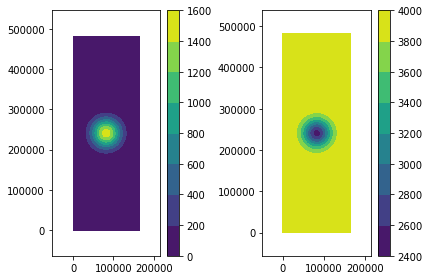

In [86]:
# EEL configuration, flat bottom + mound

jpiglo = 83
jpjglo = 242

reso_m = 2000.0
e1 = reso_m * np.arange(0, jpiglo)
e2 = reso_m * np.arange(0, jpjglo)
Lx, Ly = e1[-1], e2[-1]

# EEL has 4000m depth, also put two walls in
bathy = 4000.0 * np.ones((1, jpjglo, jpiglo))

xx, yy = np.meshgrid(e1, e2)
mound = 1500.0 * np.exp(   -(  ( (yy - Ly / 2.0) ** 2 + (xx - Lx / 2.0) ** 2 ) / 35e3 ** 2  ))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, mound)
plt.colorbar()
plt.axis("equal")
plt.tight_layout()

bathy[0, :, :] -= mound
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, bathy[0, :, :])
plt.colorbar()
plt.axis("equal")
plt.tight_layout()

bathy[0,  0, :] = 0.0
bathy[0, -1, :] = 0.0

gen_bathy_meter(jpiglo, jpjglo, e1, e2, bathy, "EEL", "bathy_meter_EEL.nc")

*** SUCCESS writing example file bathy_meter_UNAGI_R050.nc


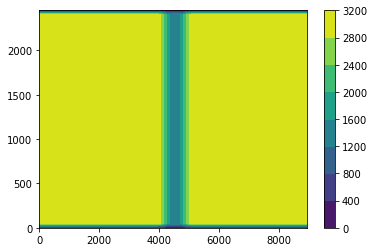

In [11]:
# UNAGI configuration, based on SO channel of Dave Munday
# 9000km long, 2400km wide, 3000m deep

# relevant numbers
# res  [nx short]  nx    ny      nz
# 100   40         90    24 + 2  30 + 1
#  50   80        180    48 + 2  30 + 1
#  25  160        360    96 + 2  30 + 1
#  15             600   160 + 2  30 + 1
#  10  400        900   240 + 2  30 + 1

bathy_filename = "bathy_meter_UNAGI_R050.nc"

jpiglo = 180
jpjglo = 48 + 2 # add to grid points on
jpkglo = 30 + 1 # add the bottom level in
reso_m = 50.0e3
e1 = reso_m * np.arange(0, jpiglo)
e2 = reso_m * np.arange(0, jpjglo)
Lx, Ly = e1[-1], e2[-1]

# UNAGI has 3000m depth, also put two walls in
oce_depth = 3000.0
bathy = oce_depth * np.ones((1, jpjglo, jpiglo))

l_ridge = True
ridge_H = 1500.0
ridge_L = 500.0e3 # half width of ridge

if l_ridge:
    ridge_x1d = np.zeros(jpiglo)
    for ji in range(jpiglo):
        if (e1[ji] > -ridge_L - 100.0e3 + Lx / 2.0) & (e1[ji] < -100.0e3 + Lx / 2.0):
            ridge_x1d[ji] = 0.5 * ridge_H * (1.0 + np.cos(np.pi * (e1[ji] + Lx / 2.0 + 100.0e3) / ridge_L))
        elif (e1[ji] > 100.0e3 + Lx / 2.0) & (e1[ji] < ridge_L + 100.0e3 + Lx / 2.0):
            ridge_x1d[ji] = 0.5 * ridge_H * (1.0 + np.cos(np.pi * (e1[ji] + Lx / 2.0 - 100.0e3) / ridge_L))
        elif (e1[ji] >= -100.0e3 + Lx / 2.0) & (e1[ji] <= 100.0e3 + Lx / 2.0):
            ridge_x1d[ji] = ridge_H
else:
    ridge_x1d = oce_depth * np.zeros(jpiglo)

bathy[0, :, :] -= ridge_x1d[np.newaxis, :]
bathy[0,  0, :] = 0.0
bathy[0, -1, :] = 0.0
    
plt.contourf(e1 / 1e3, e2 / 1e3, bathy[0, :, :])
plt.colorbar()

gen_bathy_meter(jpiglo, jpjglo, e1, e2, bathy, "UNAGI", bathy_filename)

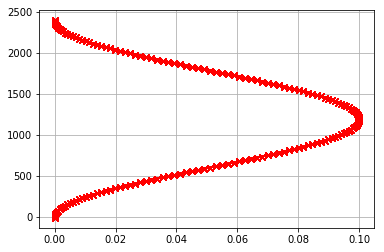

In [37]:
# use the generated bathy_meter.nc in DOMAINcfg to generate a domaincfg file
# the use that domaincfg file to generate the initial state and forcing files

# no meridional wind here so just put everything on T points
filename = "domcfg_UNAGI_R015.nc"
data = Dataset(filename)
jpiglo = data.variables["jpiglo"][:]
jpjglo = data.variables["jpjglo"][:]
jpkglo = data.variables["jpkglo"][:]
lonV   = data.variables["glamv"][0, :, :]
latV   = data.variables["gphiv"][0, :, :]
lonT   = data.variables["glamt"][0, :, :]
latT   = data.variables["gphit"][0, :, :]
e1t    = data.variables["e1t"][0, 0, 0]
z      = data.variables["nav_lev"][:]
data.close()

# have a sinusoidally varying wind but zero everything else
Ly     = 2400.0e3
Ly_mid = (Ly - e1t) / 2.0 # take into account the slight offset of the T/Vgrid
Lz     = 3000

tau0 = 0.2 * 1.0
utau = np.zeros((1, jpjglo, jpiglo))
utau[0, :, :] = tau0 * 0.5 * ( 1.0 + np.cos(2.0 * np.pi * (latT * 1.0e3 - Ly_mid) / Ly) )
utau[0, 0, :] = 0.0
utau[0, -1, :] = 0.0

vtau = np.zeros((1, jpjglo, jpiglo))
qtot = np.zeros((1, jpjglo, jpiglo))
qsr  = np.zeros((1, jpjglo, jpiglo))
emp  = np.zeros((1, jpjglo, jpiglo))

plt.plot(utau[0, :, 0], latT, 'rx-')
plt.grid()

gen_forcing(jpiglo, jpjglo, lonT, latT, utau, vtau, qtot, qsr, emp, filename.replace("domcfg", "forcing_tau1x"))

*** SUCCESS writing example file state_UNAGI_R015.nc!


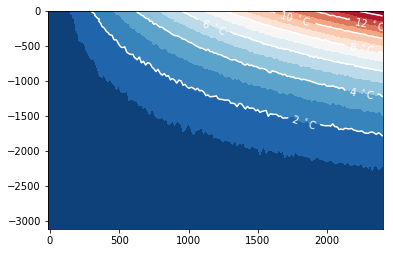

In [38]:
# Choose the amplitude of the temperature variations
dtheta = 15.0

# Choose the e-folding scale for the stratification.
z0 = 1000.0

# Generate the idealised temperature stratification, used as both an initial
# condition and for the restoring temperature in the sponge regions.

toce = np.zeros((1, jpkglo, jpjglo, jpiglo))
soce = 35.0 * np.ones((1, jpkglo, jpjglo, jpiglo))

sss = deepcopy(soce[:, 0, :, :])

yy, zz = np.meshgrid(latT[:, 0], -z)
yy *= 1.0e3

# Linear gradient at surface with exponential decay at depth and 0oC at
# the southern boundary (similar to Abernathey et al., 2011)
for ji in range(jpiglo):
    toce[0, :, :, ji] = (dtheta * (  ( yy / Ly )
                                   * ( np.exp( zz / z0) - np.exp(-Lz / z0) ) 
                                   / ( 1.0 - np.exp( -Lz / z0 ) )
                                   ) 
                        )

# because of the grid there is some offset, add it back on
toce -= toce[0, 0, 0, 0]

# add some noise
toce += np.random.normal(0, 0.05, (1, jpkglo, jpjglo, jpiglo))

# % Make sure there is no water colder than 0.5oC.
toce[toce < 0.25] = 0.25
    
# Pick out the surface temperature for the restoring condition.
sst = deepcopy(toce[:, 0, :, :])

# note the first and last y point is going to be set to masked out
plt.contourf(yy / 1.0e3, zz, toce[0, :, :, 1], np.arange(0, 16, 1), cmap = "RdBu_r")
lines = plt.contour(yy / 1.0e3, zz, toce[0, :, :, 1], np.arange(2, 16, 2), colors = "w")
plt.clabel(lines, fmt = r"$%i\ {}^\circ \mathrm{C}$", colors = 'w')

gen_istate(lonT, latT, z, toce, soce, sst, sss, filename.replace("domcfg", "state"))

In [252]:
# MITgcm
rho0 = 1035
alpT = 2.0e-4
Tref = 2.5
print("MITgcm value = %.6f" % (rho0 * (1 - alpT * (15 - Tref))))
print("MITgcm value = %.6f" % (rho0 * (1 - alpT * (0  - Tref))))

# NEMO
rho0 = 1026
alpT = 2.0e-4
Tref = 10
print("NEMO  value = %.6f" % (rho0 * (1 - alpT * (15 - Tref))))
print("NEMO  value = %.6f" % (rho0 * (1 - alpT * (0  - Tref))))

MITgcm value = 1032.412500
MITgcm value = 1035.517500
NEMO  value = 1024.974000
NEMO  value = 1028.052000


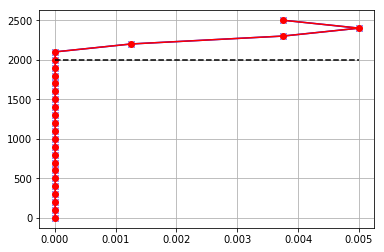

In [6]:
# testing code for generating diffkr

filename = "UNAGI_R100_domcfg.nc"
data = Dataset(filename)
jpiglo = data.variables["jpiglo"][:]
jpjglo = data.variables["jpjglo"][:]
jpkglo = data.variables["jpkglo"][:]
data.close()
reso_m = 100.0e3 # 100 km resolution
e2 = reso_m * np.arange(0, jpjglo)

avt0 = 1.0e-5
avtf = 5.0e-3
L_sponge = 300.0e3
Ly   = 2400.0e3 # 2400km is where the wall SHOULD be at

diffkr = avt0 + (0.5 * avtf * ( 1 + np.cos( np.pi * (e2 - e2[-2]) / L_sponge ) )
               - 0.5 * avt0 * ( 1 + np.cos( np.pi * (e2 - e2[-2]) / L_sponge ) )
                )
diffkr = np.where(e2 > 2000.0e3, diffkr, avt0)

amp_factor = 1 + (0.5 * 500 * ( 1 + np.cos( np.pi * (e2 - e2[-2]) / L_sponge ) )
               -  0.5       * ( 1 + np.cos( np.pi * (e2 - e2[-2]) / L_sponge ) )
                )
amp_factor = np.where(e2 > 2000.e3, amp_factor, 1.0)

plt.plot(diffkr, e2 / 1e3, 'bx-')
plt.plot(amp_factor * avt0, e2 / 1e3, 'ro-')
plt.plot([0, avtf], [2000, 2000], 'k--')
plt.grid()

In [7]:
y

array([ -10,    0,   10,   20,   30,   40,   50,   60,   70,   80,   90,
        100,  110,  120,  130,  140,  150,  160,  170,  180,  190,  200,
        210,  220,  230,  240,  250,  260,  270,  280,  290,  300,  310,
        320,  330,  340,  350,  360,  370,  380,  390,  400,  410,  420,
        430,  440,  450,  460,  470,  480,  490,  500,  510,  520,  530,
        540,  550,  560,  570,  580,  590,  600,  610,  620,  630,  640,
        650,  660,  670,  680,  690,  700,  710,  720,  730,  740,  750,
        760,  770,  780,  790,  800,  810,  820,  830,  840,  850,  860,
        870,  880,  890,  900,  910,  920,  930,  940,  950,  960,  970,
        980,  990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080,
       1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190,
       1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300,
       1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410,
       1420, 1430, 1440, 1450, 1460, 1470, 1480, 14

int1 = 0.7485, int2 = 0.3735, int3 = 0.3494


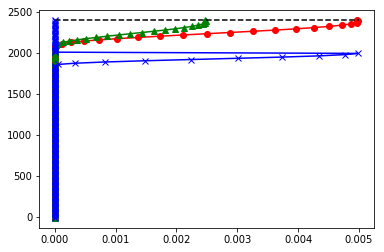

In [23]:
# test = (1. + 0.5 * 500.0 * (    1. + np.cos(  np.pi * ( yT - 2300. ) / 300.  )   )
#            - 0.5  * ( 1. + np.cos(  np.pi * ( yT - 2300. ) / 300.  )   )
#        )
spacing = 15
y = np.arange(-spacing, 2400 + spacing, spacing)

test = (0. + 0.5 * 500.0 * ( 1. + np.cos(  np.pi * ( y - y[-2] ) / 300.  )   )
           - 0.5         * ( 1. + np.cos(  np.pi * ( y - y[-2] ) / 300.  )   )
       )
test = np.where(y >= 2100, test, 0.0)
test *= 1.0e-5

test1 = (0. + 0.5 * 250.0 * ( 1. + np.cos(  np.pi * ( y - y[-2] ) / 300.  )   )
            - 0.5         * ( 1. + np.cos(  np.pi * ( y - y[-2] ) / 300.  )   )
       )
test1 = np.where(y >= 2100, test1, 0.0)
test1 *= 1.0e-5

test2 = (0. + 0.5 * 500.0 * ( 1. + np.cos(  np.pi * ( y - 2000 ) / 150.  )   )
            - 0.5         * ( 1. + np.cos(  np.pi * ( y - 2000 ) / 150.  )   )
       )
test2 = np.where(y > 1850, test2, 0.0)
test2 = np.where(y <= 2000, test2, 0.0)
test2 *= 1.0e-5

plt.plot(test, y, 'ro-', test1, y, 'g^-', test2, y, 'bx-')
plt.plot([0, 0.005], [2400, 2400], 'k--')

int1 = np.trapz(test[(y < 2400)], y[(y < 2400)])
int2 = np.trapz(test1[(y < 2400)], y[(y < 2400)])
int3 = np.trapz(test2[(y <= 2000)], y[(y <= 2000)])

print("int1 = %.4f, int2 = %.4f, int3 = %.4f" % (int1, int2, int3) )

*** SUCCESS writing example file bathy_meter_DAVE_R100.nc


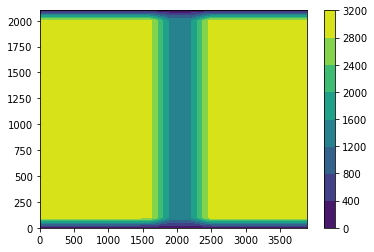

In [8]:
# Dave's configuration, based on SO channel of Dave Munday
# 4000km long, 2000km wide, 3000m deep

jpiglo = 40
jpjglo = 20 + 2 # add to grid points on
jpkglo = 30 + 1 # add the bottom level in
reso_m = 100.0e3 # 100 km resolution
e1 = reso_m * np.arange(0, jpiglo)
e2 = reso_m * np.arange(0, jpjglo)
Lx, Ly = e1[-1], e2[-1]

# UNAGI has 3000m depth, also put two walls in
oce_depth = 3000.0
bathy = oce_depth * np.ones((1, jpjglo, jpiglo))

l_ridge = True
ridge_H = 1500.0
ridge_L = 400.0e3 # half width of ridge

if l_ridge:
    ridge_x1d = np.zeros(jpiglo)
    for ji in range(jpiglo):
        if (e1[ji] > -ridge_L - 100.0e3 + Lx / 2.0) & (e1[ji] < -100.0e3 + Lx / 2.0):
            ridge_x1d[ji] = 0.5 * ridge_H * (1.0 + np.cos(np.pi * (e1[ji] + Lx / 2.0 + 100.0e3) / ridge_L))
        elif (e1[ji] > 100.0e3 + Lx / 2.0) & (e1[ji] < ridge_L + 100.0e3 + Lx / 2.0):
            ridge_x1d[ji] = 0.5 * ridge_H * (1.0 + np.cos(np.pi * (e1[ji] + Lx / 2.0 - 100.0e3) / ridge_L))
        elif (e1[ji] >= -100.0e3 + Lx / 2.0) & (e1[ji] <= 100.0e3 + Lx / 2.0):
            ridge_x1d[ji] = ridge_H
else:
    ridge_x1d = oce_depth * np.zeros(jpiglo)

bathy[0, :, :] -= ridge_x1d[np.newaxis, :]
bathy[0,  0, :] = 0.0
bathy[0, -1, :] = 0.0
    
plt.contourf(e1 / 1e3, e2 / 1e3, bathy[0, :, :])
plt.colorbar()

gen_bathy_meter(jpiglo, jpjglo, e1, e2, bathy, "DAVE", "bathy_meter_DAVE_R100.nc")

*** SUCCESS writing example file forcing_R100_DAVE.nc!


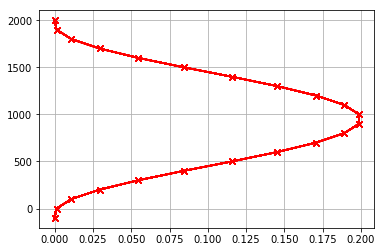

In [70]:
# use the generated bathy_meter.nc in DOMAINcfg to generate a domaincfg file
# the use that domaincfg file to generate the initial state and forcing files

# no meridional wind here so just put everything on T points
filename = "domcfg_R100_DAVE.nc"
data = Dataset(filename)
jpiglo = data.variables["jpiglo"][:]
jpjglo = data.variables["jpjglo"][:]
jpkglo = data.variables["jpkglo"][:]
lonV   = data.variables["glamv"][0, :, :]
latV   = data.variables["gphiv"][0, :, :]
lonT   = data.variables["glamt"][0, :, :]
latT   = data.variables["gphit"][0, :, :]
e1t    = data.variables["e1t"][0, 0, 0]
z      = data.variables["nav_lev"][:]
data.close()

# have a sinusoidally varying wind but zero everything else
Ly     = 2000.0e3
Ly_mid = (Ly - e1t) / 2.0 # take into account the slight offset of the T/Vgrid
Lz     = 3000

tau0 = 0.2
utau = np.zeros((1, jpjglo, jpiglo))
utau[0, :, :] = tau0 * 0.5 * ( 1.0 + np.cos(2.0 * np.pi * (latT * 1.0e3 - Ly_mid) / Ly) )
utau[0, 0, :] = 0.0
utau[0, -1, :] = 0.0

vtau = np.zeros((1, jpjglo, jpiglo))
qtot = np.zeros((1, jpjglo, jpiglo))
qsr  = np.zeros((1, jpjglo, jpiglo))
emp  = np.zeros((1, jpjglo, jpiglo))

plt.plot(utau[0, :, 0], latT, 'rx-')
plt.grid()

gen_forcing(jpiglo, jpjglo, lonT, latT, utau, vtau, qtot, qsr, emp, "forcing_R100_DAVE.nc")

*** SUCCESS writing example file state_R100_DAVE.nc!


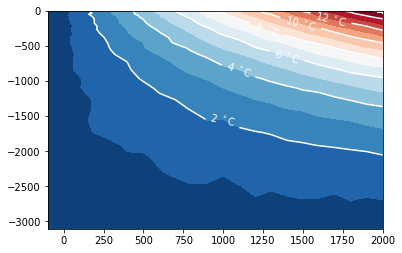

In [72]:
# Choose the amplitude of the temperature variations
dtheta = 15.0

# Choose the e-folding scale for the stratification.
z0 = 1000.0

# Generate the idealised temperature stratification, used as both an initial
# condition and for the restoring temperature in the sponge regions.

toce = np.zeros((1, jpkglo, jpjglo, jpiglo))
soce = 35.0 * np.ones((1, jpkglo, jpjglo, jpiglo))

sss = deepcopy(soce[:, 0, :, :])

yy, zz = np.meshgrid(latT[:, 0], -z)
yy *= 1.0e3

# Linear gradient at surface with exponential decay at depth and 0oC at
# the southern boundary (similar to Abernathey et al., 2011)
for ji in range(jpiglo):
    toce[0, :, :, ji] = (dtheta * (  ( yy / Ly )
                                   * ( np.exp( zz / z0) - np.exp(-Lz / z0) ) 
                                   / ( 1.0 - np.exp( -Lz / z0 ) )
                                   ) 
                        )

# because of the grid there is some offset, add it back on
toce -= toce[0, 0, 0, 0]

# add some noise
toce += np.random.normal(0, 0.05, (1, jpkglo, jpjglo, jpiglo))

# % Make sure there is no water colder than 0.5oC.
toce[toce < 0.25] = 0.25
    
# Pick out the surface temperature for the restoring condition.
sst = deepcopy(toce[:, 0, :, :])

# note the first and last y point is going to be set to masked out
plt.contourf(yy / 1.0e3, zz, toce[0, :, :, 1], np.arange(0, 16, 1), cmap = "RdBu_r")
lines = plt.contour(yy / 1.0e3, zz, toce[0, :, :, 1], np.arange(2, 16, 2), colors = "w")
plt.clabel(lines, fmt = r"$%i\ {}^\circ \mathrm{C}$", colors = 'w')

gen_istate(lonT, latT, z, toce, soce, sst, sss, "state_R100_DAVE.nc")

In [56]:
Ly

2000

In [51]:
e1t

100000.0